<a href="https://colab.research.google.com/github/JongHyun070105/MachineLearning2025/blob/main/3710%EB%B0%95%EC%A2%85%ED%98%84_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8%EB%A7%81(%EC%8B%A4%EC%8A%B5%EB%AC%B8%EC%A0%9C_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 머신러닝 모델링
* 머신러닝 프로세스 실습
* 데이터 파일읽기, EDA 데이터 분석, 데이터 전처리, Train, Test 데이터셋 분할, 정규화, 모델 생성 및 학습 순서대로 실습
* 단일 분류 예측 모델: LogisticRegression, KNN, DecisionTree
* 앙상블(Ensemble) 모델 : RandomForest, XGBoost
   

### 1. 실습을 위한 세팅 설정

### 2. 머신러닝 모델 프로세스
1. 라이브러리 임포트
2. 데이터 가져오기
3. 탐색적 데이터 분석
4. 데이터 전처리: 데이터 타입 변환, Null데이터 처리, 누락데이터 처리, 더미특성 생성, 특성 추출 등
5. Train, Test 데이터셋 분할
6. 데이터 정규화
7. 모델 개발
8. 모델 성능 평가

### 라이브러리 임포트

In [ ]:
# pandas, numpy,matplotlib.pyplot임포트

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 데이터 로드

In [ ]:
# cust_data1.csv파일 읽기

df = pd.read_csv('cust_data1.csv')

### 데이터 분석


In [ ]:
df.head(5)

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,Y
1,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,N
2,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,N
3,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,N
4,C,F,78,1,N,N,1361.7999,1173.99990,0.0000,N


class(고객 등급), sex(성별), age(나이), service(사용서비스수), stop(서비스 중지 여부), npay(미납여부), avg_bill(3개월 평균 요금), A_bill(A서비스 3개월 평균 요금), B_bill(B서비스 3개월 평균 요금), termination(해지여부)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        7814 non-null   object 
 1   sex          7814 non-null   object 
 2   age          7814 non-null   int64  
 3   service      7814 non-null   int64  
 4   stop         7814 non-null   object 
 5   npay         7814 non-null   object 
 6   avg_bill     7814 non-null   float64
 7   A_bill       7814 non-null   float64
 8   B_bill       7814 non-null   float64
 9   termination  7814 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 610.6+ KB


In [ ]:
# 조건 인덱싱
# df[(df['sex'] == 'M') & (df['avg_bill'] >= 13000)]
cond = (df['sex'] == 'M') | (df['avg_bill'] >= 13000)

df[cond]

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
1,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,N
2,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,N
3,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,N
5,D,M,22,1,N,N,13562.8000,2222.00010,3673.0000,N
7,D,M,60,1,N,N,5503.0000,2093.00010,0.0000,N
...,...,...,...,...,...,...,...,...,...,...
7806,D,M,46,0,N,N,6920.0000,2076.00000,4152.0000,Y
7807,D,M,54,1,N,Y,5198.0666,0.00000,4760.8666,N
7808,E,M,65,4,N,N,9115.1334,3209.60000,0.0000,N
7809,C,M,76,1,N,N,1860.0000,1716.00000,0.0000,N


<Axes: xlabel='termination'>

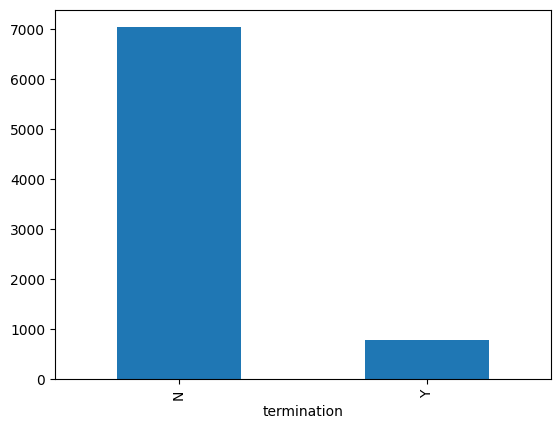

In [ ]:
df['termination'].value_counts().plot(kind = 'bar')

### 데이터 전처리

In [ ]:
df.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,Y
1,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,N
2,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,N
3,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,N
4,C,F,78,1,N,N,1361.7999,1173.99990,0.0000,N


In [ ]:
# termination Y -> 1, N -> 0
df['termination'] = df['termination'].replace('Y', 1)
df['termination'] = df['termination'].replace('N', 0)
df.head()

# df['termination'].replace(['Y','N'],[1,0])

<ipython-input-8-b021fb679761>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['termination'] = df['termination'].replace('N', 0)


,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,1
1,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,0
2,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,0
3,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,0
4,C,F,78,1,N,N,1361.7999,1173.99990,0.0000,0


In [ ]:
# LabelEncoder 는 범주형 데이터를 숫자형 레이블로 바꿔주는 클래스
# 사이킷런의 preprocessing 모듈에서 LabelEncoder 클래스 임포트
from sklearn.preprocessing import LabelEncoder

# 레이블인코더는 순서가 없는 범주형 데이터에 적합
# npay 컬럼
le = LabelEncoder()
df['npay']=le.fit_transform(df['npay'])
df.tail()

# 만약 문자열로 다시 복원하려고 한다면
# origin_labels = le.inverse_transform(df['npay'])

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
7809,C,M,76,1,N,0,1860.0000,1716.000000,0.0000,0
7810,C,F,15,1,N,1,1296.0999,194.414985,643.1001,0
7811,G,M,12,1,N,0,13799.6666,2069.949990,10605.9266,0
7812,C,F,40,0,N,0,3140.0000,942.000000,1884.0000,1
7813,C,F,59,1,N,0,2436.9000,365.535000,1839.9000,0


In [ ]:
# 아래 컬럼에 원핫 인코딩 적용
cal_col = ['class', 'sex', 'stop']

df = pd.get_dummies(data = df, columns = cal_col, drop_first=True)
df.info()
# df['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          7814 non-null   int64  
 1   service      7814 non-null   int64  
 2   npay         7814 non-null   int64  
 3   avg_bill     7814 non-null   float64
 4   A_bill       7814 non-null   float64
 5   B_bill       7814 non-null   float64
 6   termination  7814 non-null   int64  
 7   class_D      7814 non-null   bool   
 8   class_E      7814 non-null   bool   
 9   class_F      7814 non-null   bool   
 10  class_G      7814 non-null   bool   
 11  class_H      7814 non-null   bool   
 12  sex_M        7814 non-null   bool   
 13  stop_Y       7814 non-null   bool   
dtypes: bool(7), float64(3), int64(4)
memory usage: 480.9 KB


KeyError: 'class'

### 모델 개발

In [ ]:
# 입력 (x)
X = df.drop('termination', axis = 1).values
y = df['termination']

In [ ]:
X.shape, y.shape

((7814, 13), (7814,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify = y, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5469, 13), (2345, 13), (5469,), (2345,))

In [ ]:
df.tail()

,age,service,npay,avg_bill,A_bill,B_bill,termination,class_D,class_E,class_F,class_G,class_H,sex_M,stop_Y
7809,76,1,0,1860.0000,1716.000000,0.0000,0,False,False,False,False,False,True,False
7810,15,1,1,1296.0999,194.414985,643.1001,0,False,False,False,False,False,False,False
7811,12,1,0,13799.6666,2069.949990,10605.9266,0,False,False,False,True,False,True,False
7812,40,0,0,3140.0000,942.000000,1884.0000,1,False,False,False,False,False,False,False
7813,59,1,0,2436.9000,365.535000,1839.9000,0,False,False,False,False,False,False,False


In [ ]:
# bool 타입의 컬럼 int형 변환
bool_cols = df.select_dtypes(include = 'bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.tail()

,age,service,npay,avg_bill,A_bill,B_bill,termination,class_D,class_E,class_F,class_G,class_H,sex_M,stop_Y
7809,76,1,0,1860.0000,1716.000000,0.0000,0,0,0,0,0,0,1,0
7810,15,1,1,1296.0999,194.414985,643.1001,0,0,0,0,0,0,0,0
7811,12,1,0,13799.6666,2069.949990,10605.9266,0,0,0,0,1,0,1,0
7812,40,0,0,3140.0000,942.000000,1884.0000,1,0,0,0,0,0,0,0
7813,59,1,0,2436.9000,365.535000,1839.9000,0,0,0,0,0,0,0,0


In [ ]:
# MinMax Scailing
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:2],y_train[:2]

(array([[0.38      , 0.33333333, 1.        , 0.4295439 , 0.06384702,
         0.41944434, 0.        , 0.        , 0.        , 0.        ,
         1.        , 1.        , 0.        ],
        [0.58      , 0.11111111, 0.        , 0.20111297, 0.38498933,
         0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 1.        , 0.        ]]),
 892     0
 4873    0
 Name: termination, dtype: int64)

#### 모델별 바차트 그려주고, 성능 확인을 위한 함수

In [ ]:
# 모델별로 Accuracy 함수 저장
#  모델 Accuracy 점수 순서대로 바차트를 그려 모델별로 성능 확인 가능

from sklearn.metrics import accuracy_score  # 정확도 평가 함수 불러오기

my_predictions={}  # 모델 이름과 해당 모델의 정확도를 저장하는 딕셔너리


# matplotlib에서 사용 가능한 색상 리스트
# 각 막대(bar)에 랜덤 색상을 지정하기 위해 사용됨
colors = [
    'r','c','m','y','k','khaki','teal','orchid','sandybrown','greenyellow',
    'dodgerblue','deepskyblue','rosybrown','firebrick','deeppink','crimson','salmon',
    'darkred','olivedrab','olive','forestgreen','royalblue','indigo','navy','mediumpurple',
    'chocolate','gold','darkorange','seagreen','turquoise','steelblue','slategray',
    'purple','midnightblue','slateblue','dimgray','cadetblue','tomato'
]

# 모델명, 예측값, 실제값을 주면 위의 plot_predictions함수 호출하여 Scatter그래프를 그림
# 모델별 MSE 값을 bar chart 로 그려줌

# 정확도 평가 및 그래프 함수
def accuracy_eval(name_, pred, actual):
    global predictions
    global colors
    plt.figure(figsize=(12,9)) # 시각화를 위한 기본 도화지 설정 (크기: 12x9)
    acc=accuracy_score(actual, pred) # 정확도 계산 (실제값과 예측값 비교)
    my_predictions[name_]=acc*100 # 모델 이름과 정확도(%)를 딕셔너리 my_predictions에 저장
    y_value=sorted(my_predictions.items(), key=lambda x:x[1], reverse=True) # 정확도 기준으로 내림차순 정렬
    df=pd.DataFrame(y_value, columns=['model', 'accuracy']) # 정렬된 결과를 DataFrame으로 변환
    print(df) # 정확도 테이블 출력
    length=len(df) # 모델 수만큼 그래프 y축 길이 조정
    plt.figure(figsize=(10, length)) # 시각화 크기 설정
    ax=plt.subplot()  # 서브플롯 생성
    ax.set_yticks(np.arange(len(df)))    # y축 위치 설정 (0부터 모델 수만큼)
    ax.set_yticklabels(df['model'], fontsize=15)  # y축 라벨을 모델 이름으로 설정
    bars = ax.barh(np.arange(len(df)), df['accuracy'])  # 수평 막대그래프 생성


    # 각 막대에 랜덤 색상 적용 및 정확도 값 표시
    for i, v in enumerate(df['accuracy']):
        idx=np.random.choice(len(colors))  # colors 리스트에서 랜덤 색상 선택
        bars[i].set_color(colors[idx])      # 해당 막대에 색상 적용
        ax.text(v+2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold') # 정확도 값 표시

    # 그래프 제목 및 x축 범위 설정
    plt.title('accuracy', fontsize=18)
    plt.xlim(0,100)
    plt.show()



### 로지스틱 회귀(LogisticRegression, 분류)

In [ ]:
# 모델 임포트
from sklearn.linear_model import LogisticRegression
# 오차행렬 생성을 위한 임포트
from sklearn.metrics import confusion_matrix
# 성능평가 지표 임포트
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 성능지표를 표로 보여주는 리포트 임포트
from sklearn.metrics import classification_report

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lg.score(X_test, y_test)

0.9321961620469084

In [ ]:
lg_pred = lg.predict(X_test)

In [ ]:
confusion_matrix(y_test, lg_pred)

array([[2098,   11],
       [ 148,   88]])

In [ ]:
accuracy_score(y_test, lg_pred)

0.9321961620469084

In [ ]:
recall_score(y_test,lg_pred)

0.3728813559322034

In [ ]:
precision_score(y_test, lg_pred)

0.8888888888888888

In [ ]:
f1_score(y_test, lg_pred)

0.5253731343283582

In [ ]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2109
           1       0.89      0.37      0.53       236

    accuracy                           0.93      2345
   macro avg       0.91      0.68      0.74      2345
weighted avg       0.93      0.93      0.92      2345



  model   accuracy
0   KNN  96.076759
1    lg  93.219616


<Figure size 1200x900 with 0 Axes>

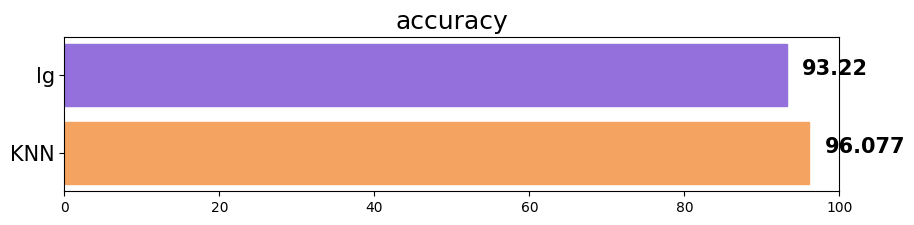

In [ ]:
accuracy_eval('lg', lg_pred, y_test)

### 분류기 성능 평가 지표

### KNN(K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,y_test)

0.9607675906183369

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test, knn_pred)

array([[2082,   27],
       [  65,  171]])

In [ ]:
accuracy_score(y_test, knn_pred)

0.9607675906183369

In [ ]:
recall_score(y_test,knn_pred)

0.7245762711864406

In [ ]:
precision_score(y_test, knn_pred)

0.8636363636363636

In [ ]:
f1_score(y_test, knn_pred)

0.7880184331797235

In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2109
           1       0.86      0.72      0.79       236

    accuracy                           0.96      2345
   macro avg       0.92      0.86      0.88      2345
weighted avg       0.96      0.96      0.96      2345



  model   accuracy
0   KNN  96.076759
1    lg  93.219616


<Figure size 1200x900 with 0 Axes>

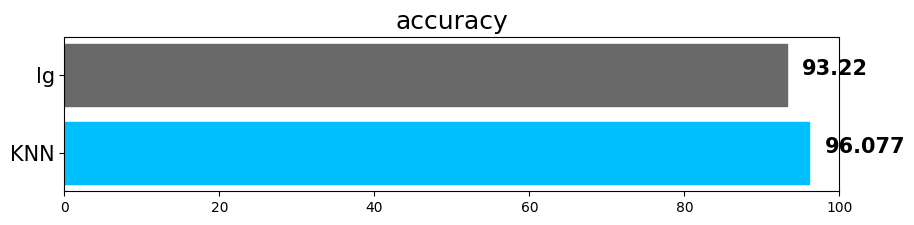

In [ ]:
accuracy_eval('KNN', knn_pred, y_test)

### 결정트리(DecisionTree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth = 10, random_state = 42)
dc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
dc.score(X_test,y_test)

0.9735607675906184

In [ ]:
dc_pred = dc.predict(X_test)

In [ ]:
confusion_matrix(y_test, dc_pred)

array([[2081,   28],
       [  34,  202]])

In [ ]:
accuracy_score(y_test, dc_pred)

0.9735607675906184

In [ ]:
recall_score(y_test,dc_pred)

0.8559322033898306

In [ ]:
precision_score(y_test, dc_pred)

0.8782608695652174

In [ ]:
f1_score(y_test, dc_pred)

0.8669527896995708

In [ ]:
print(classification_report(y_test, dc_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2109
           1       0.88      0.86      0.87       236

    accuracy                           0.97      2345
   macro avg       0.93      0.92      0.93      2345
weighted avg       0.97      0.97      0.97      2345



  model   accuracy
0    dc  97.356077
1   KNN  96.076759
2    lg  93.219616


<Figure size 1200x900 with 0 Axes>

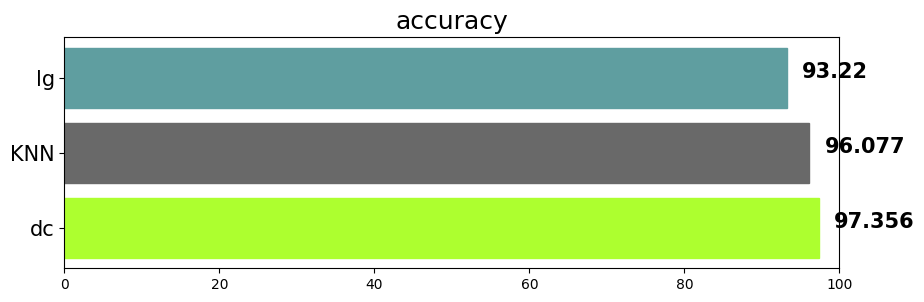

In [ ]:
accuracy_eval('dc', dc_pred, y_test)

### 앙상블 기법의 종류
* 배깅(Bagging): 여러개의 DecisionTree활용하고 샘플 중복 생성을 통해 결과 도출. RandomForest
* 부스팅(Boosting): 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식, XGBoost, LGBM
* 스태킹(Stacking): 여러 모델을 기반으로 예측된 결과를 통해 Final 학습(meta model)이 다시 한번 예측

### 랜덤포레스트(RandomForest)
* Bagging 대표적인 모델로써, 훈련세트를 무작위로 각기 다른 서브셋으로 데이터셋을 만들고
* 여러개의 DecisionTree로 학습하고 다수결로 결정하는 모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 3, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [ ]:
rfc.score(X_test,y_test)

0.9744136460554371

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
confusion_matrix(y_test, rfc_pred)

array([[2083,   26],
       [  34,  202]])

In [ ]:
accuracy_score(y_test, rfc_pred)

0.9744136460554371

In [ ]:
recall_score(y_test,rfc_pred)

0.8559322033898306

In [ ]:
precision_score(y_test, rfc_pred)

0.8859649122807017

In [ ]:
f1_score(y_test, rfc_pred)

0.8706896551724138

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2109
           1       0.89      0.86      0.87       236

    accuracy                           0.97      2345
   macro avg       0.93      0.92      0.93      2345
weighted avg       0.97      0.97      0.97      2345



  model   accuracy
0   rfc  97.441365
1    dc  97.356077
2   KNN  96.076759
3    lg  93.219616


<Figure size 1200x900 with 0 Axes>

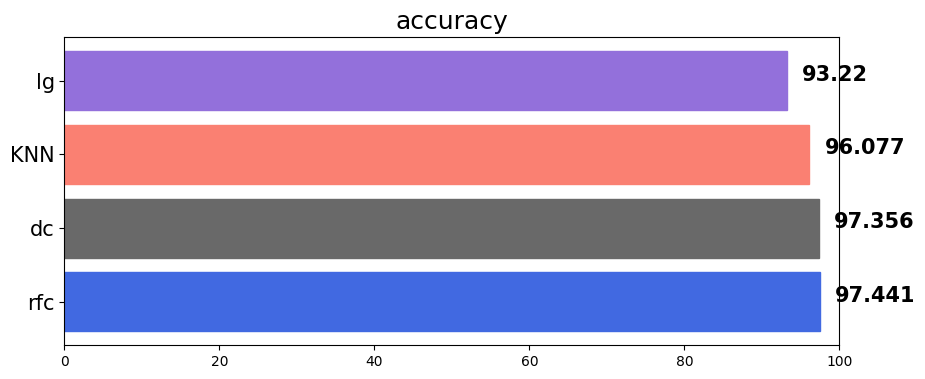

In [ ]:
accuracy_eval('rfc', rfc_pred, y_test)

### XGBoost
* 여러 개의 DecisionTree를 결합하여 Strong Learner 만드는 Boosting 앙상블 기법
* Kaggle 대회에서 자주 사용하는 모델

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier(n_estimators = 3, random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb.score(X_test,y_test)

0.976545842217484

In [ ]:
xgb_pred = xgb.predict(X_test)

In [ ]:
confusion_matrix(y_test, xgb_pred)

array([[2085,   24],
       [  31,  205]])

In [ ]:
accuracy_score(y_test, xgb_pred)

0.976545842217484

In [ ]:
recall_score(y_test,xgb_pred)

0.8686440677966102

In [ ]:
precision_score(y_test, xgb_pred)

0.8951965065502183

In [ ]:
f1_score(y_test, xgb_pred)

0.8817204301075269

In [ ]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2109
           1       0.90      0.87      0.88       236

    accuracy                           0.98      2345
   macro avg       0.94      0.93      0.93      2345
weighted avg       0.98      0.98      0.98      2345



  model   accuracy
0   xgb  97.654584
1   rfc  97.441365
2    dc  97.356077
3   KNN  96.076759
4    lg  93.219616


<Figure size 1200x900 with 0 Axes>

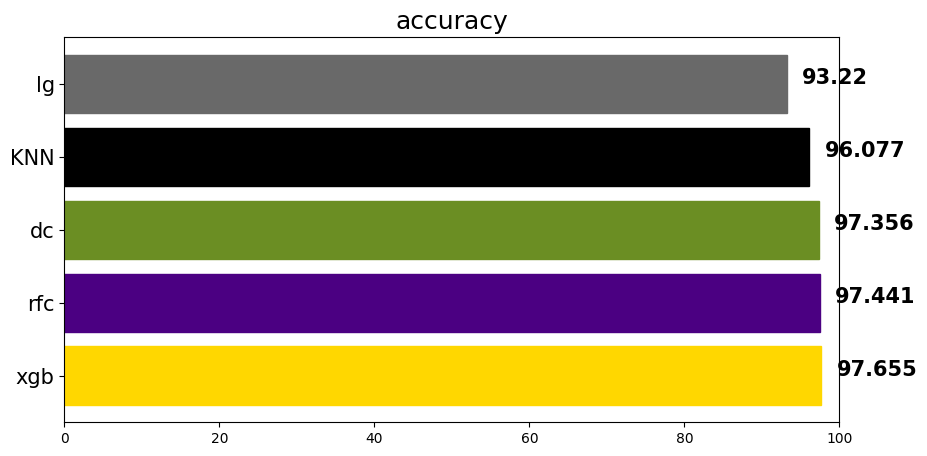

In [ ]:
accuracy_eval('xgb', xgb_pred, y_test)